In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import pyreadstat
import scipy
from utils import sim, standardize, jitter_binary, bin_edges_equalN, plot_binned_residuals
%load_ext autoreload
%autoreload 2

In [58]:
data_folder = 'data/police/'
data_df = pd.read_csv(data_folder + 'frisk_with_noise.dat', sep=" ", skiprows=4, header=1)
data_df = data_df.loc[data_df.crime==1, :]
data_df = data_df.dropna()
data_df = data_df.loc[data_df['past.arrests']>0, :]
factor_eth = sm.tools.categorical(data_df, col='eth', drop=True)
factor_eth = factor_eth.rename(columns={1: 'black', 2: 'hispanic', 3: 'white'})
factor_eth = factor_eth.drop(columns='black')
factor_prec = sm.tools.categorical(data_df, col='precinct', drop=True)
factor_prec = factor_prec.drop(columns=1)
X = pd.concat([factor_eth.set_index(data_df.index), factor_prec.set_index(data_df.index)], axis=1)
X = sm.add_constant(X)
y = data_df['stops']
arrests = data_df['past.arrests']

In [61]:
model = sm.GLM(y, X, family=sm.families.Poisson(), offset=np.log(arrests))#, offset=np.log(data_df['past.arrests']))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  stops   No. Observations:                  225
Model:                            GLM   Df Residuals:                      148
Model Family:                 Poisson   Df Model:                           76
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1277.0
Date:                Mon, 27 Jul 2020   Deviance:                       1194.7
Time:                        12:25:36   Pearson chi2:                 1.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7449      0.085     -8.736      0.000      -0.912      -0.578
hispanic      -0.3054      0.014    -22.045      0.000      -0.333      -0.278
white         -0.9167      0.021    -44.595      0.000      -0.957      -0.876
2             -0.0727      0.115     -0.632      0.527      -0.298       0.153
3              0.9081      0.095      9.509      0.000       0.721       1.095
4              1.4840      0.095     15.578      0.000       1.297       1.671
5              0.3036      0.100      3.042      0.002       0.108       0.499
6              0.4827      0.102      4.714      0.000       0.282       0.683
7              0.1490      0.108      1.378      0.168      -0.063       0.361
8              0.0759      0.097      0.784      0.433      -0.114       0.265
9              0.0647      0.133      0.486      0.627      -0.196       0.325
10             0.4765      0.098      4.851      0.000       0.284       0.669
11             0.6874      0.097      7.056      0.000       0.496       0.878
12             0.9923      0.101      9.831      0.000       0.794       1.190
13             0.3824      0.095      4.010      0.000       0.195       0.569
14             0.7077      0.097      7.327      0.000       0.518       0.897
15             0.3338      0.098      3.416      0.001       0.142       0.525
16             0.7023      0.099      7.127      0.000       0.509       0.896
17            -0.6974      0.107     -6.498      0.000      -0.908      -0.487
18            -0.1875      0.100     -1.867      0.062      -0.384       0.009
19            -0.5212      0.103     -5.057      0.000      -0.723      -0.319
20            -0.0259      0.103     -0.251      0.802      -0.228       0.176
21             0.5212      0.096      5.402      0.000       0.332       0.710
22             0.8786      0.091      9.669      0.000       0.701       1.057
23             0.1510      0.099      1.530      0.126      -0.042       0.344
24             0.4029      0.096      4.191      0.000       0.214       0.591
25             0.5731      0.091      6.327      0.000       0.396       0.751
26            -1.0876      0.104    -10.449      0.000      -1.292      -0.884
27             1.0322      0.095     10.811      0.000       0.845       1.219
28            -1.2075      0.108    -11.196      0.000      -1.419      -0.996
29             0.3873      0.093      4.175      0.000       0.206       0.569
30            -0.0587      0.096     -0.613      0.540      -0.247       0.129
31             0.6497      0.098      6.626      0.000       0.457       0.842
32             0.7472      0.102      7.315      0.000       0.547       0.947
33             0.5648      0.093      6.092      0.000       0.383       0.747
34             0.9552      0.092     10.369      0.000       0.775       1.136
35

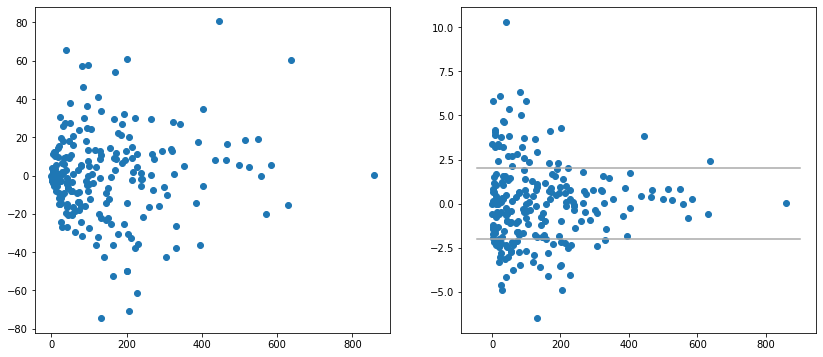

In [62]:
predicted = res.predict(X, offset=np.log(arrests))
resid = res.resid_response
z_resid = res.resid_pearson
fig, axs = plt.subplots(ncols=2, figsize=[14, 6])
axs[0].scatter(predicted, resid)
axs[1].scatter(predicted, z_resid)
xlims = axs[1].get_xlim()
axs[1].plot(xlims, [2, 2], 'darkgrey')
axs[1].plot(xlims, [-2, -2], 'darkgrey')